In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import os

# Set up paths
notebook_dir = Path.cwd()
project_dir = notebook_dir.parent
sys.path.append(str(project_dir))

# Configure visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette('viridis')

In [47]:

raw_data_path = project_dir / 'data' / 'raw' / 'hotel_bookings.csv'

if not os.path.exists(raw_data_path):
    print("Dataset not found.")
else:
    df_raw = pd.read_csv(raw_data_path)
    print(f"Dataset loaded successfully with {df_raw.shape[0]} rows and {df_raw.shape[1]} columns.")

Dataset loaded successfully with 119390 rows and 32 columns.


In [48]:
df_raw.head()
df_raw.info()
df_raw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
# Check for missing values
missing_values = df_raw.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

company     112593
agent        16340
country        488
children         4
dtype: int64

In [54]:
from src.data_processing.preprocess import DataPreprocessor

preprocessor = DataPreprocessor(raw_data_path)

preprocessor.load_data()
preprocessor.clean_data()

df_processed = preprocessor.add_derived_features()

df_processed.head()

Loaded data with 119390 rows and 32 columns.
Missing values before cleaning:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type         

e:\Onkar\Assignments\Hotel booking system\src\data_processing\preprocess.py:45: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
e:\Onkar\Assignments\Hotel booking system\src\data_processing\preprocess.py:45: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,total_revenue
0,Resort Hotel,0,342,1970-01-01 00:00:00.000002015,July,1970-01-01 00:00:00.000000027,1970-01-01 00:00:00.000000001,0,0,2,...,179.0,0,Transient,0.0,0,0,Check-Out,2015-01-07,0,0.0
1,Resort Hotel,0,737,1970-01-01 00:00:00.000002015,July,1970-01-01 00:00:00.000000027,1970-01-01 00:00:00.000000001,0,0,2,...,179.0,0,Transient,0.0,0,0,Check-Out,2015-01-07,0,0.0
2,Resort Hotel,0,7,1970-01-01 00:00:00.000002015,July,1970-01-01 00:00:00.000000027,1970-01-01 00:00:00.000000001,0,1,1,...,179.0,0,Transient,75.0,0,0,Check-Out,2015-02-07,1,75.0
3,Resort Hotel,0,13,1970-01-01 00:00:00.000002015,July,1970-01-01 00:00:00.000000027,1970-01-01 00:00:00.000000001,0,1,1,...,179.0,0,Transient,75.0,0,0,Check-Out,2015-02-07,1,75.0
4,Resort Hotel,0,14,1970-01-01 00:00:00.000002015,July,1970-01-01 00:00:00.000000027,1970-01-01 00:00:00.000000001,0,2,2,...,179.0,0,Transient,98.0,0,1,Check-Out,2015-03-07,2,196.0


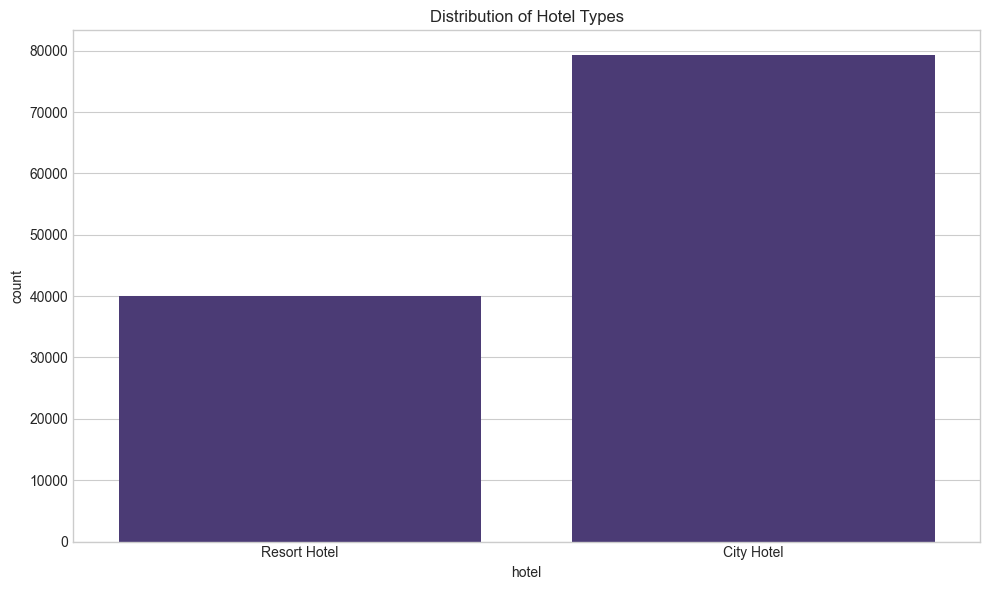

In [8]:
# Distribution of hotel types
if 'hotel' in df_processed.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_processed, x='hotel')
    plt.title('Distribution of Hotel Types')
    plt.tight_layout()
    plt.show()

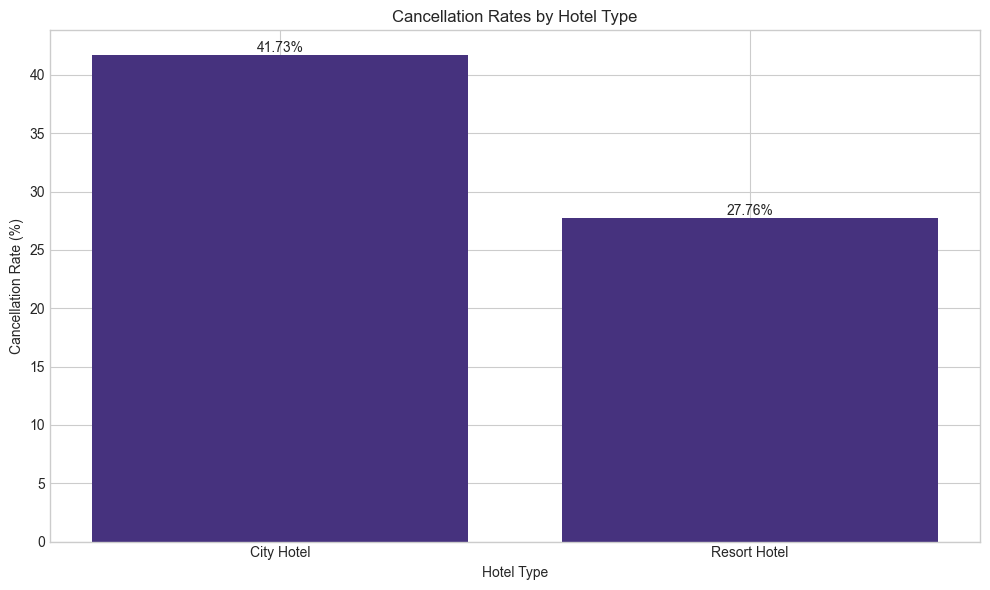

In [ ]:
if 'hotel' in df_processed.columns and 'is_canceled' in df_processed.columns:
    # Calculate percentages
    hotel_cancellation = df_processed.groupby('hotel')['is_canceled'].agg(['count', 'sum'])
    hotel_cancellation['cancellation_rate'] = (hotel_cancellation['sum'] / hotel_cancellation['count'] * 100).round(2)
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(hotel_cancellation.index, hotel_cancellation['cancellation_rate'])
    
    # Percentage labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height}%',
                ha='center', va='bottom')
    
    plt.title('Cancellation Rates')
    plt.xlabel('Hotel Type')
    plt.ylabel('Cancellation Rate (%)')
    plt.tight_layout()
    plt.show()

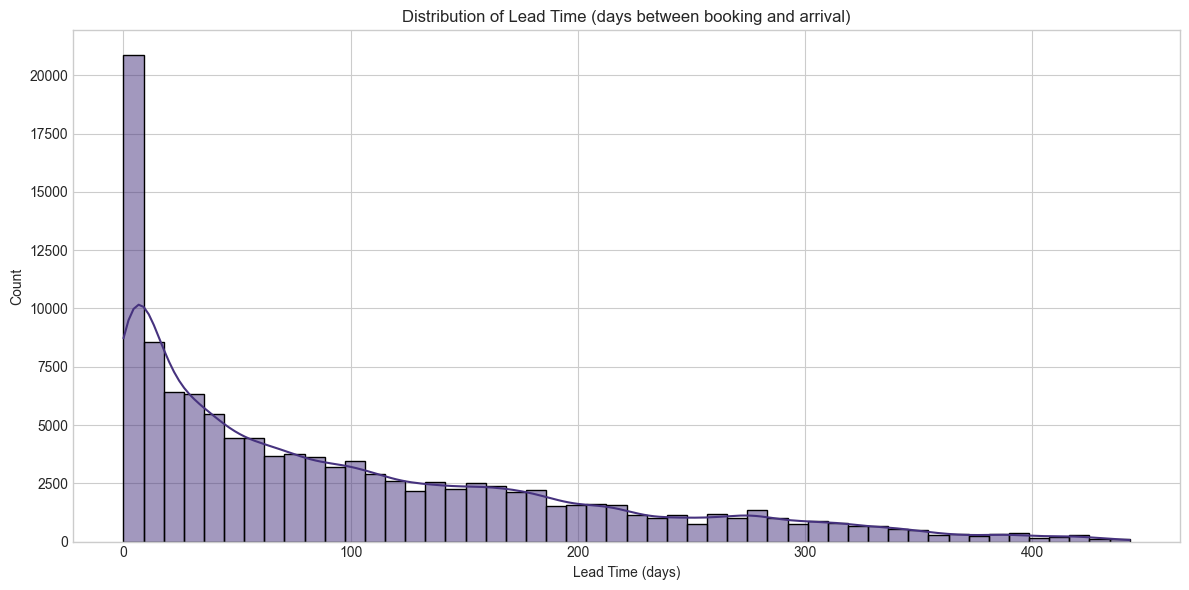

In [14]:
# Lead time distribution
if 'lead_time' in df_processed.columns:
    plt.figure(figsize=(12, 6))
    lead_filtered = df_processed[df_processed['lead_time'] < df_processed['lead_time'].quantile(0.99)]
    
    sns.histplot(data=lead_filtered, x='lead_time', kde=True, bins=50)
    plt.title('Distribution of Lead Time (days between booking and arrival)')
    plt.xlabel('Lead Time (days)')
    plt.tight_layout()
    plt.show()

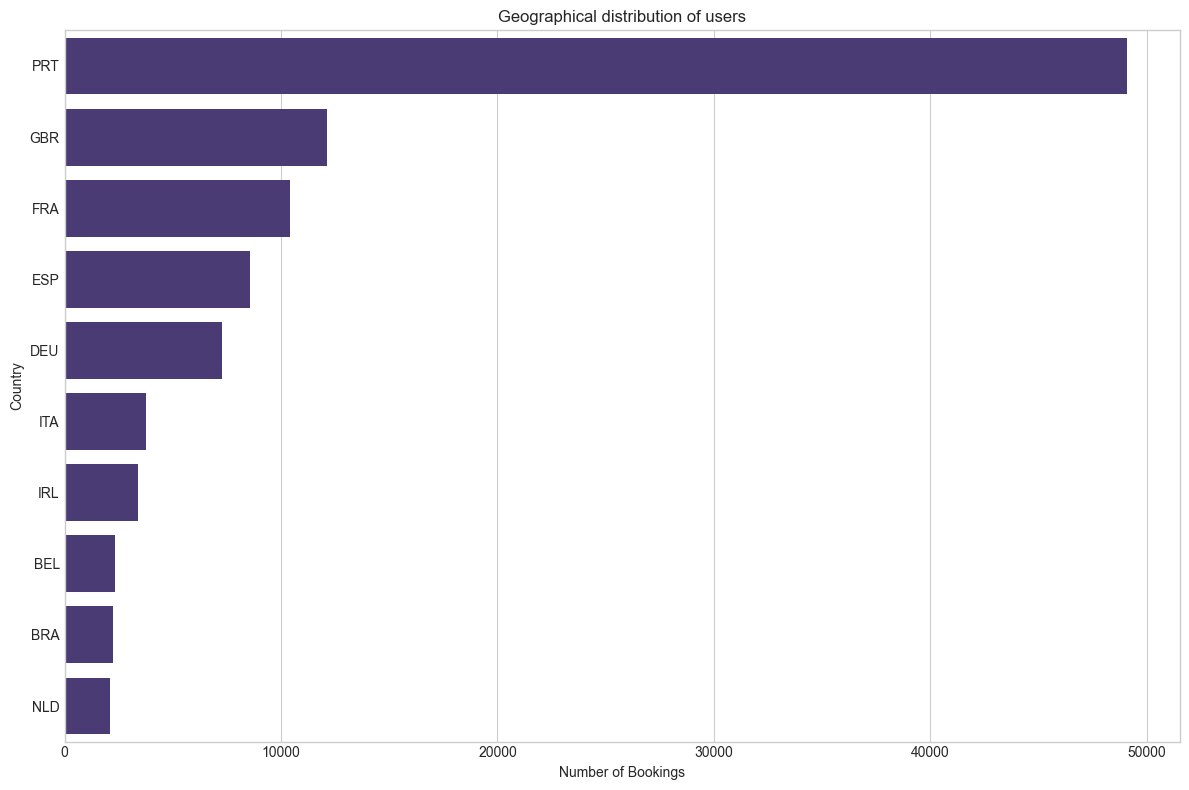

In [16]:
# Geographical distribution of users
if 'country' in df_processed.columns:
    plt.figure(figsize=(12, 8))
    top_countries = df_processed['country'].value_counts().head(10)
    sns.barplot(x=top_countries.values, y=top_countries.index)
    plt.title('Geographical distribution of users')
    plt.xlabel('Number of Bookings')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()